In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, auc
output = np.load("./label_random.npz")
edge_list, prob, labels = output["edge_list"], output["pred"], output["labels"]
predict = np.where(prob > 0.5, 1, 0)

In [2]:
res=pd.DataFrame(metrics.classification_report(labels, predict, digits=4,output_dict=True)).T
res

,precision,recall,f1-score,support
0.0,0.797183,0.621978,0.698765,455.000000
1.0,0.690090,0.841758,0.758416,455.000000
accuracy,0.731868,0.731868,0.731868,0.731868
macro avg,0.743637,0.731868,0.728591,910.000000
weighted avg,0.743637,0.731868,0.728591,910.000000


In [3]:
acc = metrics.accuracy_score(labels, predict)
precision = metrics.precision_score(labels, predict, zero_division=1 )
recall = metrics.recall_score(labels, predict)
f1 = metrics.f1_score(labels, predict)
tn, fp, fn, tp = metrics.confusion_matrix(labels, predict).ravel()
ppv = tp/(tp+fp+1.4E-45)
npv = tn/(fn+tn+1.4E-45)
item={'baslineName':'Our','Accuracy':acc,'Precision':precision,'F1-Score':f1,'PPV':ppv,'NPV':npv,'RECALL':recall,'TP':tp,'FP':fp,'TN':tn,'FN':fn}
result=pd.DataFrame([item])
result

,baslineName,Accuracy,Precision,F1-Score,PPV,NPV,RECALL,TP,FP,TN,FN
0,Our,0.731868,0.69009,0.758416,0.69009,0.797183,0.841758,383,172,283,72


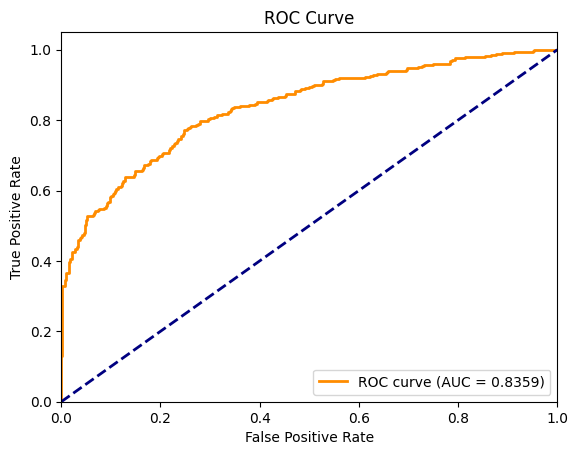

In [4]:
# 计算FPR和TPR
fpr, tpr, thresholds = roc_curve(labels, prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

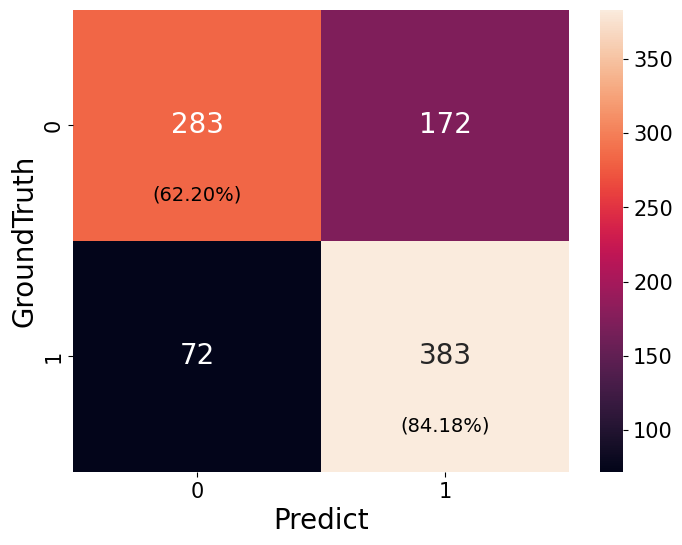

In [5]:
# 计算混淆矩阵
cm = confusion_matrix(labels, predict)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
target_names = ["0","1"]
# 绘制混淆矩阵热图
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize":20})
ax.set_xlabel('Predict', size=20)
ax.set_ylabel('GroundTruth', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gcf().set_size_inches(8, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

# 在热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    ax.annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=14, color="black")

plt.show()